In [193]:
import numpy as np
np.random.seed(2023 - 5 - 21)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ___Kernalized Support Vector Machines___
------------

In [3]:
# Linear SVMs served as effective classifiers by finding the decision boundary with maximum margin between classes.
# Linear SVMs work well with simple datasets where the classes are linearly separable.

In [4]:
# Linearly separable classes

In [5]:
x = np.arange(0, 50, step = 3)
x = np.append(x, np.arange(100, 150, step = 3))

In [6]:
x.size

34

In [7]:
y = np.append(np.random.randint(0, 100, size = 17), np.random.randint(200, 250, size = 17))
col = list(map(lambda x: "orange" if x >= 200 else "green", y))

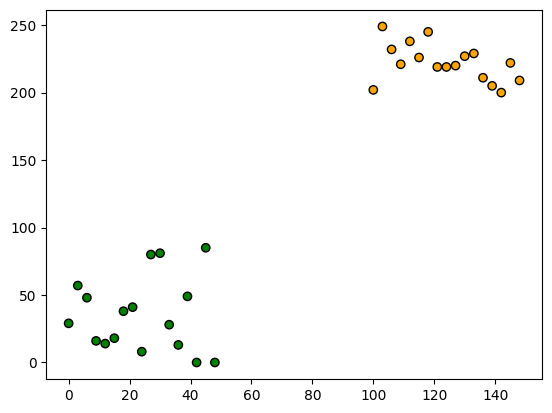

In [8]:
plt.scatter(x, y, c = col, edgecolor = "black")
plt.show()

In [9]:
# But, in real world datasets, where different classes have clusters sporadically scattered throughout the feature space, 
# classification by a linear margin is not practical.
# Certain datasets are difficult for a linear classifier to classify using a hyperplane.

In [10]:
# Kernalized SVMs are a powerful extensions of linear SVMs.
# They can make up complex models that can go beyond linear decision boundaries.
# Kernalized SVMs can be used for both regression and classification.

In [11]:
# What Kernalized SVMs do is that they take the original features and transform them into a higher dimensional feature space.
# This transformed data becomes easier to classify using a linear classifier.

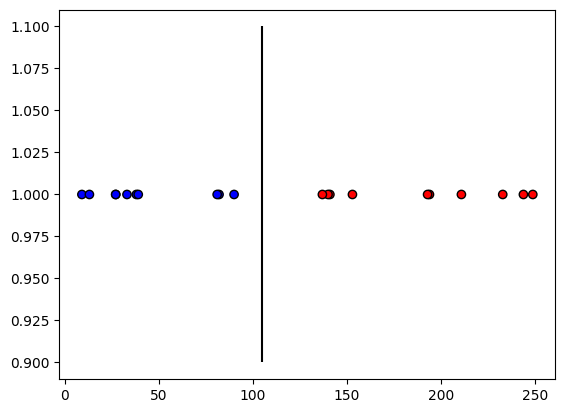

In [12]:
x = np.append(np.random.randint(0, 100, size = 10), np.random.randint(120, 250, size = 10))
clrs = list(map(lambda x: "red" if x >= 120 else "blue", x))
y = np.ones(x.size)
plt.scatter(x, y, c = clrs, edgecolor = "black")
plt.vlines(x = 105, ymax = 1.1, ymin = 0.9, color = "black")
plt.show()

In [13]:
# The above is a linear binary classifier in one dimension, where the black vertical line marks the decision boundary.
# Each data point here has one feature -> its position on the x axis
# If this data is provided to a linear SVM, It'll have no problem 

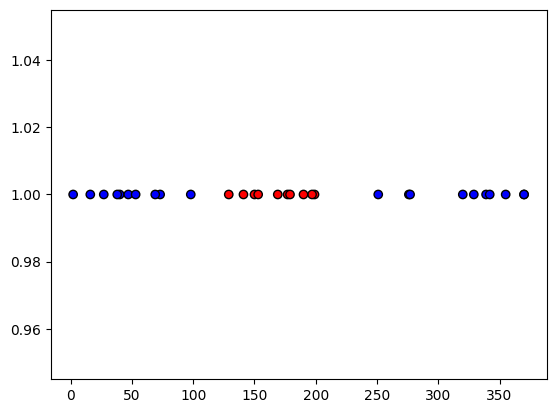

In [14]:
# Let's give the linear SVM a harder problem, where the points are no longer linearly separable.

x = np.append(np.random.randint(0, 100, size = 10), np.random.randint(120, 200, size = 10))
x = np.append(x, np.random.randint(250, 380, size = 10))
clrs = list(map(lambda x: "red" if (x >= 120) and (x < 250) else "blue", x))
y = np.ones(x.size)
plt.scatter(x, y, c = clrs, edgecolor = "black")
plt.show()

In [15]:
# A simple linear decision boundary doesn't have enough expressive power to classify these data points.
# One idea is to transform this data to a 2 dimensional feature space.

# We can generate two dimesnional data points by processing the existing feature -> a feature set of (x_i, x_i^2) can be computed for all data points.

list(zip(x, np.square(x)))[:10]

[(40, 1600),
 (16, 256),
 (47, 2209),
 (98, 9604),
 (38, 1444),
 (53, 2809),
 (73, 5329),
 (27, 729),
 (69, 4761),
 (2, 4)]

In [16]:
# Here we prepare a second feature that is the square of the first feature.
# We are not adding any new information here.
# Now we'll use the x_i ^2 in the y axes.

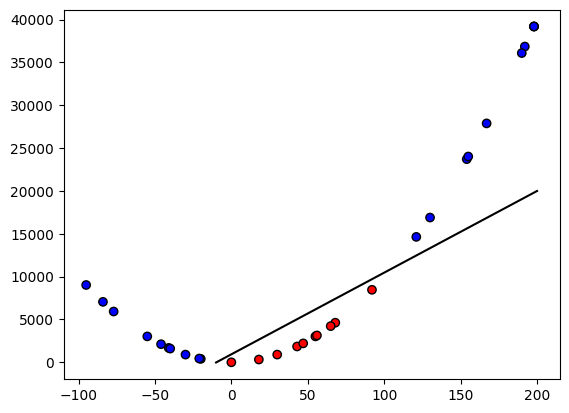

In [17]:
x = np.array([-41, -95, -77, -20, -55, -21, -40, -84, -30, -46,  55,  43,  56, 68,  92,  65,  18,  30,   0,  47, 192, 198, 167, 154, 155,
              198, 198, 130, 190, 121])

y = np.square(x)
clrs = list(map(lambda x: "red" if (x >= 0) and (x < 100) else "blue", x))

plt.scatter(x, y, c = clrs, edgecolor = "black")
plt.plot([-10, 200], [-20, 20000], color = "black")
# plt.grid()
plt.show()

In [18]:
# We can now learn a linear SVM that classifies the data points in the 2D feature space into two classes.
# For any new data points that need prediction, we can make a 2D transformation and make the predictions on the transformed version.

In [19]:
# However, the if we undo the two dimensional transformation, we'd see that the places where the linear decision boundary in the
# 2 dimensional space corresponds to the place where a parabola crosses the x axis in the 1 dimensional space.

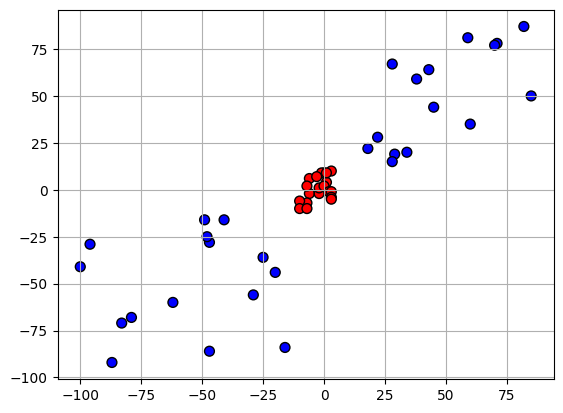

In [125]:
# Let's move to a two dimensional problem.

x_0 = np.concatenate([np.random.randint(-100, -15, size = 15), np.random.randint(-10, 11, size = 20), np.random.randint(15, 101, size = 15)])
x_1 = np.concatenate([np.random.randint(-100, -15, size = 15), np.random.randint(-10, 11, size = 20), np.random.randint(15, 101, size = 15)])

clrs = list(map(lambda x, y: "red" if ((x > -15) & (x < 15) & (y > -15) & (y < 15)) else "blue", x_0, x_1))
plt.scatter(x_0, x_1, c = clrs, s = 50, edgecolor = "black")
plt.grid(which = "major")
plt.show()

In [126]:
# Here each data point has two features -> represented in x and y axes.
# As with this, a linear SVM cannot do anything to separate the data points into classes.
# We can add a derived third feature, transforming the data into a 3 dimensional feature space.

Initialy,
## ___$x_i = (x_0, x_1)$___

After 3 dimensional transformation,

## ___$x_i = (x_0, x_1, x_2)$___
Where,
## ___$x_2 = 1 - (x_0^2 + x_1^2)$___

In [127]:
# Now we have 3 features -> x_0, x_1, x_2
# x_0 & x_1 are real authentic features
# while x_2 is a derived feature.

In [132]:
x_0 = np.concatenate([np.random.randint(-100, -15, size = 15), np.random.randint(-10, 11, size = 20), np.random.randint(15, 101, size = 15)])
x_1 = np.concatenate([np.random.randint(-100, -15, size = 15), np.random.randint(-10, 11, size = 20), np.random.randint(15, 101, size = 15)])
x_2 = 1 - (np.square(x_0) + np.square(x_1))

clrs = list(map(lambda x_0, x_1: "red" if ((x_0 > -15) & (x_0 < 15) & (x_1 > -15) & (x_1 < 15)) else "blue", x_0, x_1))

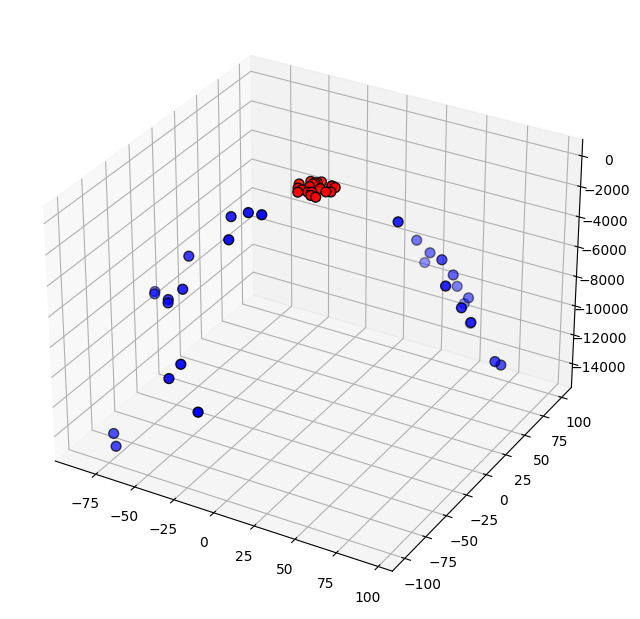

In [139]:
fig = plt.figure(figsize = (6, 6))
axes = fig.add_axes(rect = (1, 1, 1, 1), projection = "3d")
axes.scatter(x_0, x_1, x_2, c = clrs, s = 50, edgecolor = "black")
plt.show()

In [140]:
# Here, this transformation shapes the data points into parabola around 0,0
# Data points close to 0,0 get mapped to higher vertcial positions.
# closer to 0,o -> lower x_0 and lowe x_1 values
# consequently 1 - (x_0^2 + x_1^2) -> higher values.

In [141]:
# Now, we can define a hyperplane that separates the red points from the blue points.

In [142]:
X, Y = np.meshgrid(np.arange(-100, 100, step = 1), np.arange(-100, 100, step = 1))
Z = np.full(X.shape, -3000)

In [143]:
X, X.shape

(array([[-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99],
        ...,
        [-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99]]),
 (200, 200))

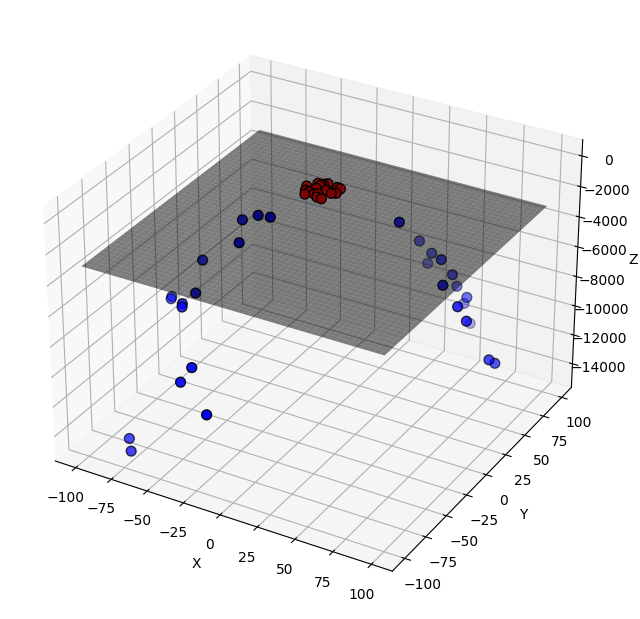

In [144]:
fig = plt.figure(figsize = (6, 6))
axes = fig.add_axes(rect = (1, 1, 1, 1), projection = "3d")
axes.scatter(x_0, x_1, x_2, c = clrs, s = 50, edgecolor = "black")

axes.plot_surface(X, Y, Z, alpha = 0.5, color = "black")
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_zlabel("Z")
plt.show()

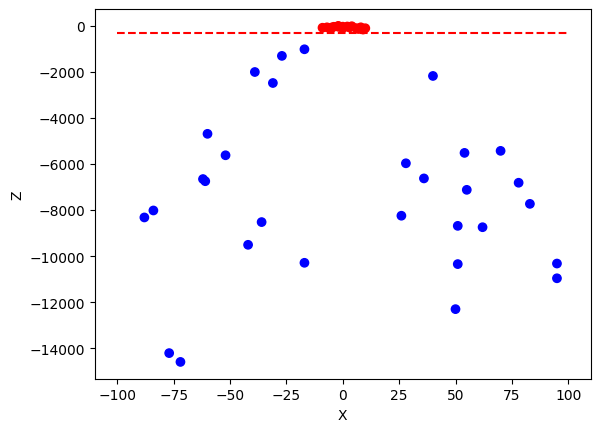

In [150]:
# 2D view on XZ plane
# See the location of the red points!

fig, axes = plt.subplots()
axes.scatter(x_0, x_2, c = clrs)
axes.hlines(y = -300, xmin = -100, xmax = 100, color = "red", linestyle = "--")
axes.set_xlabel("X")
axes.set_ylabel("Z")
plt.show()

In [151]:
# Here the decision boundary lies in a 3 dimensional feature space where the parabola intersects the maximum margin hyperplane
# This corresponds to an ellipse like decision boundary in 2 dimensional space.

In [152]:
# This transformation works by transforming an n dimensional feature space => an n + 1 dimensional feature space.

In [153]:
# The idea of transforming the data points to a new feature space where a linear classifier can be easily applied is a very general and powerful one.
# There are different kernels available for doing diferent transformations.
# One type of such kernels is the Radial Basis Function Kernel. (RBF)

# ___Radial Basis Function Kernel___
-----------

In [154]:
# A kernel function in an SVM tells us what is the similarity of two data points in the new feature space given their similarity in the 
# original feature space.
# For RBF, the similarity between two points in the transformed feature space is given by;

# ___$K(x, y) = exp[-\gamma \cdot ||x - y||^2]$___

In [155]:
# Kernalized SVM tries to find a linear decision boundary with maximum margin, between classes in the transformed feature space
# not in the original feature space.
# This linear decision boundary is learnt by a linear SVM corresponds to a non-linear decision boundary in the original feature space,

In [156]:
# An important mathematically remarkable character of kernalized SVMs is called the kernel trick.
# Kernel trick is that the algorithm does not have to perform the transformation on the data points, to the new high dimensional feature space.

# Kernalized SVMs can compute this complex decision boundaries in the form of similarity calculations between pairs of points in the high 
# dimensional feature space.
# The similarity functions is essentially a dot product is the kernel in SVM.

# This flexibility allows us to plug in different kernels as we see fit.
# Different kernels perform different types of transformations to the higher dimensional feature space.

In [161]:
x, y = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)

In [164]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.85)

In [167]:
# The default kernel is RBF kernel. Many other kernels are also supported like the polynomial kernel.

svclassifier = SVC(kernel = "rbf", degree = 3).fit(train_x, train_y)
svclassifier.score(test_x, test_y)

0.8666666666666667

In [170]:
# Polynomial kernel performs better in this context. -> where the kernel introduces new features as polynomial combinations of existing features.

svclassifier = SVC(kernel = "poly", degree = 3).fit(train_x, train_y)
svclassifier.score(test_x, test_y)

0.9333333333333333

## ___Radial Basis Function Kernel &rarr; $\gamma$ parameter___
-----------------

In [171]:
# The gamma parameter of RBF controls how much influence a single data point exerts in predictions.
# This, in turn affect how tightly the decision boundaries surround the data points in input space.

# small gamma -> larger similarity radius => where points quite far apart are considered similar.
# consequently => more points get grouped together => smoother decision boundaries.

# larger gamma -> smaller similarity radius => kernel value decays very quickly and the points have to be very close to be considerd similar.
# leading to more complex, tight decision boundaries.

In [178]:
for i in [0, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5]:
    svclassifier = SVC(kernel = "poly", degree = 3, gamma = i).fit(train_x, train_y)
    print(f"gamma: {i}, R2 score: {svclassifier.score(test_x, test_y):.4f}")

gamma: 0, R2 score: 0.0000
gamma: 0.005, R2 score: 0.6000
gamma: 0.01, R2 score: 0.9333
gamma: 0.05, R2 score: 0.8000
gamma: 0.1, R2 score: 0.8000
gamma: 0.5, R2 score: 0.8667
gamma: 1, R2 score: 0.8667
gamma: 2, R2 score: 0.8667
gamma: 5, R2 score: 0.8667


In [179]:
# linear SVMs had a C parameter => regularization parameter.
# C controls the tradeoff between finding the maximum margin and avoiding misclassifications.
# This C parameter is also important in kernalized SVMs and interacts with the gamma paramater.

In [181]:
# One important thing to remember is to normalize the input data, so all features have comparable units (on the same scale).

In [182]:
bcancer = load_breast_cancer()

In [189]:
# Without normalization.

train_x, test_x, train_y, test_y = train_test_split(bcancer.data, bcancer.target, train_size = 0.85)

In [190]:
svclassifier = SVC(kernel = "rbf", C = 10, gamma = 0.01).fit(train_x, train_y)

In [192]:
svclassifier.score(train_x, train_y)

1.0

In [191]:
svclassifier.score(test_x, test_y)

0.627906976744186

In [194]:
# A good example of overfitting, since the model performs exceptionally well on the training data yet fails to generalize to the test data.

In [199]:
# With scaling

train_x, test_x, train_y, test_y = train_test_split(bcancer.data, bcancer.target, train_size = 0.85)

mmscaler = MinMaxScaler().fit(train_x)

scaled_trainx = mmscaler.transform(train_x)
scaled_testx = mmscaler.transform(test_x)

In [213]:
svclassifier = SVC(kernel = "rbf", C = 10, gamma = 0.01).fit(scaled_trainx, train_y)

In [214]:
# Whoa!

svclassifier.score(scaled_testx, test_y)

0.9534883720930233

In [215]:
# If we increase the C to 100

svclassifier = SVC(kernel = "rbf", C = 100, gamma = 0.01).fit(scaled_trainx, train_y)
svclassifier.score(scaled_testx, test_y)

0.9883720930232558

In [ ]:
# In kernalized SVMs, C and gamma are tuned simultaneously.